importing essential libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df = pd.read_csv('new.csv')
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [3]:
df.shape

(2240, 29)

Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


 Checking & dropping the null values in the dataset.

In [6]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')


Column Income contains 24 null values.


In [7]:
df = df.dropna()
print("Total missing values are:", len(df))



Total missing values are: 2216


In [ ]:
df_filled = df.fillna(df.mean())  # Replace NaNs with column means
tsne_data = model.fit_transform(df_filled)


In [9]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [10]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')


In [11]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)


Data Visualization and Analysis

In [12]:
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)


['Education', 'Marital_Status']
['Income']


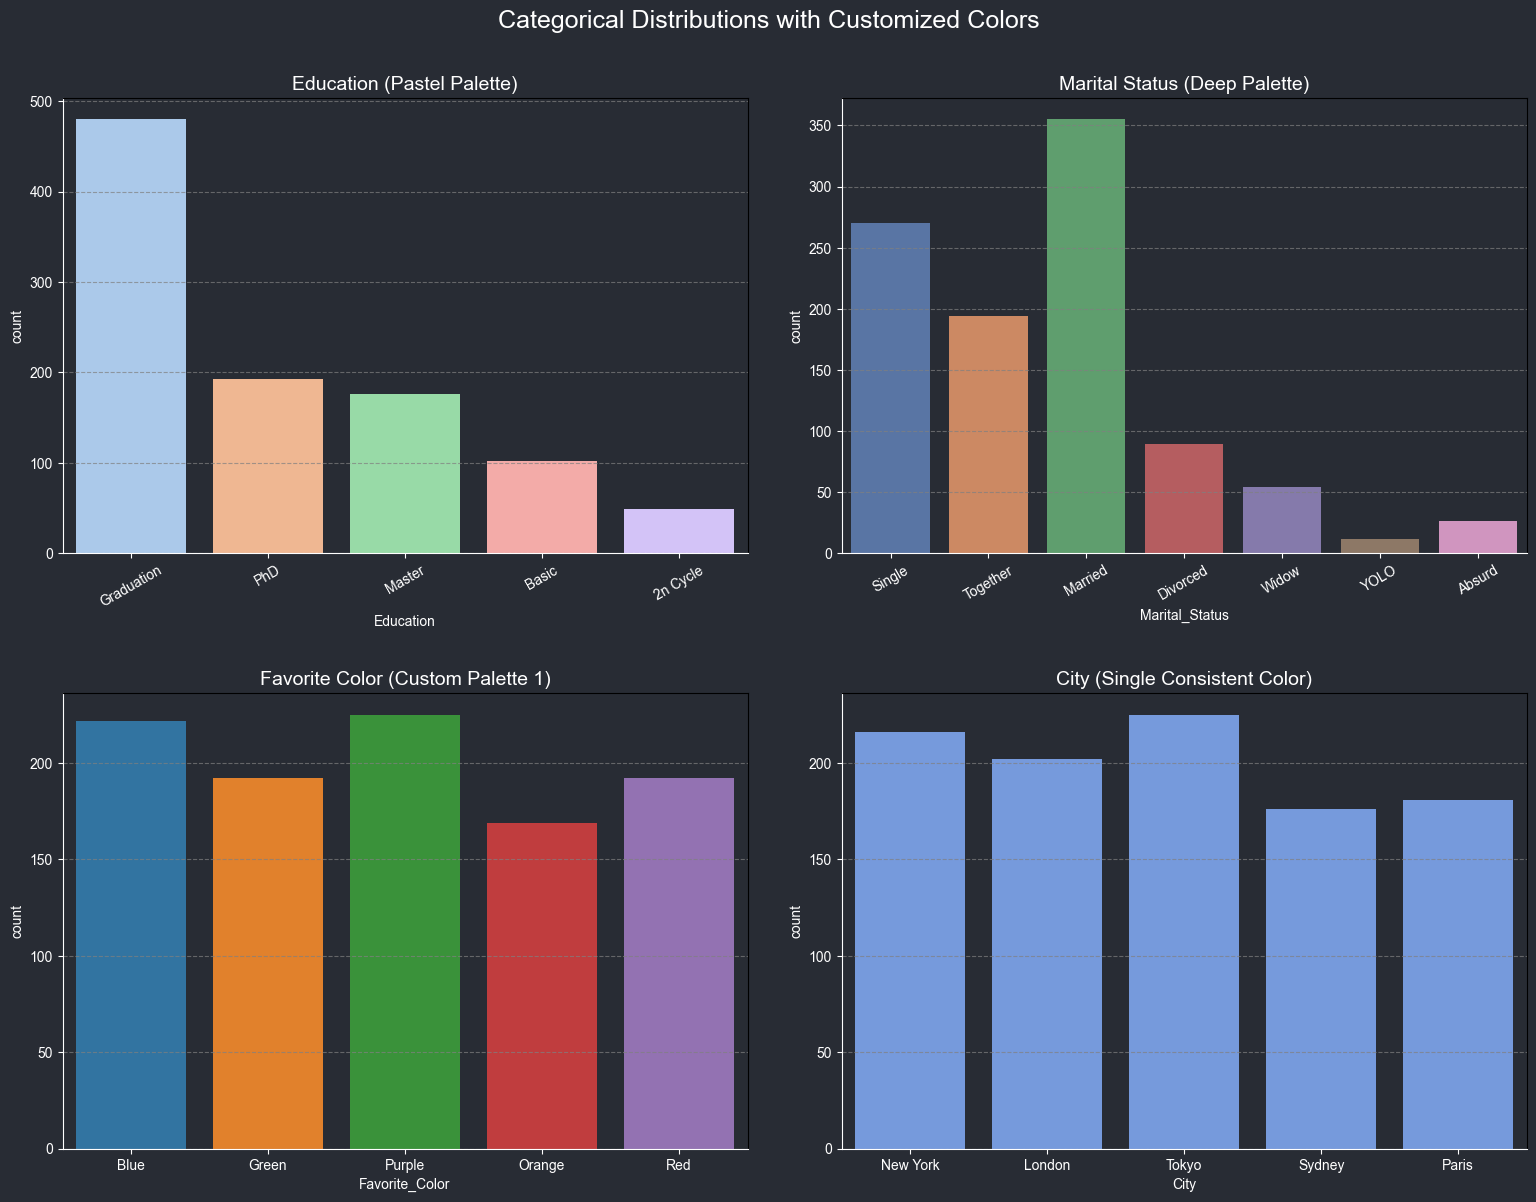

In [13]:
data = {
    'Education': np.random.choice(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], size=1000, p=[0.5, 0.2, 0.15, 0.1, 0.05]),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Together', 'Divorced', 'Widow', 'Absurd', 'YOLO'], size=1000, p=[0.25, 0.35, 0.2, 0.1, 0.05, 0.025, 0.025]),
    'Favorite_Color': np.random.choice(['Blue', 'Green', 'Red', 'Purple', 'Orange'], size=1000),
    'City': np.random.choice(['New York', 'London', 'Paris', 'Tokyo', 'Sydney'], size=1000)
}
df = pd.DataFrame(data)
objects = ['Education', 'Marital_Status', 'Favorite_Color', 'City']
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
plt.style.use('seaborn-v0_8-darkgrid') 
sb.countplot(x=df['Education'], ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Education (Pastel Palette)', fontsize=14, color='white')
axes[0, 0].tick_params(axis='x', rotation=30) 
sb.countplot(x=df['Marital_Status'], ax=axes[0, 1], palette='deep')
axes[0, 1].set_title('Marital Status (Deep Palette)', fontsize=14, color='white')
axes[0, 1].tick_params(axis='x', rotation=30)

custom_palette_1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 
sb.countplot(x=df['Favorite_Color'], ax=axes[1, 0], palette=custom_palette_1)
axes[1, 0].set_title('Favorite Color (Custom Palette 1)', fontsize=14, color='white')
main_color = '#6595ED' # Cornflower Blue, a pleasant, professional blue
sb.countplot(x=df['City'], ax=axes[1, 1], color=main_color)
axes[1, 1].set_title('City (Single Consistent Color)', fontsize=14, color='white')

fig.patch.set_facecolor('#282C34') # Dark background for the entire figure
for ax in axes.flat:
    ax.set_facecolor('#282C34') 
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey') # Subtle grid

plt.tight_layout(pad=3.0) # Adjust spacing with more padding
plt.suptitle('Categorical Distributions with Customized Colors', fontsize=18, y=1.02, color='white') # Overall title
plt.show()

In [14]:
df['Marital_Status'].value_counts()


Marital_Status
Married     355
Single      270
Together    194
Divorced     89
Widow        54
Absurd       26
YOLO         12
Name: count, dtype: int64

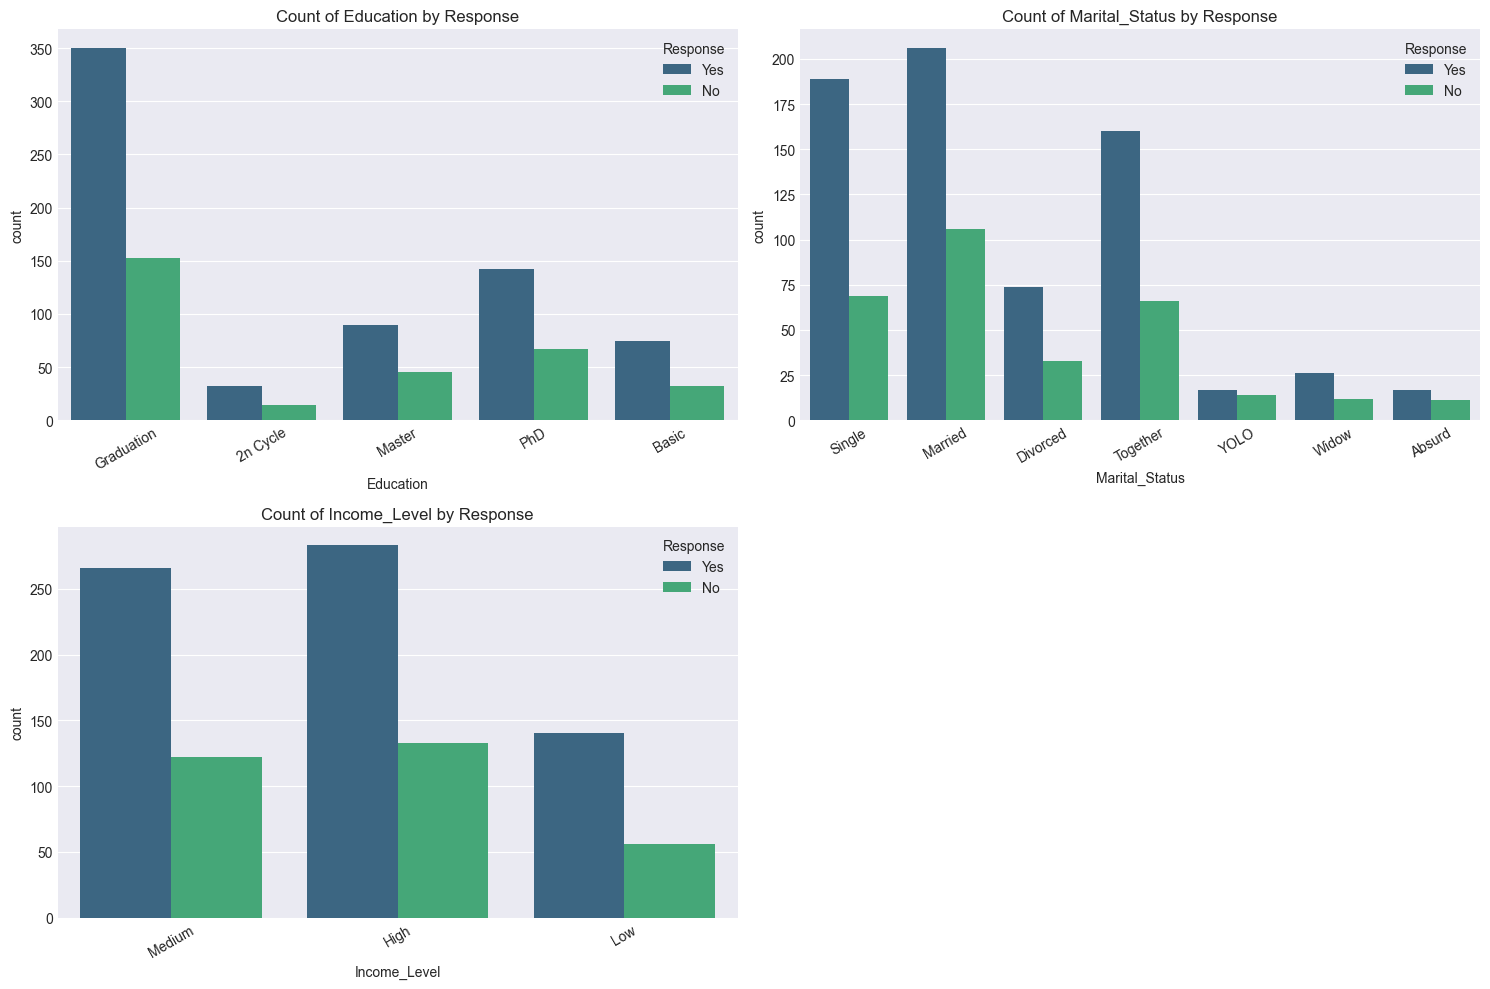

In [15]:

# 1. Create a Sample DataFrame (Replace with your actual data)
np.random.seed(42) # For reproducibility

data = {
    'Education': np.random.choice(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], size=1000, p=[0.5, 0.2, 0.15, 0.1, 0.05]),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Together', 'Divorced', 'Widow', 'Absurd', 'YOLO'], size=1000, p=[0.25, 0.35, 0.2, 0.1, 0.05, 0.025, 0.025]),
    'Response': np.random.choice(['Yes', 'No'], size=1000, p=[0.7, 0.3]), # Dummy 'Response' column
    'Income_Level': np.random.choice(['High', 'Medium', 'Low'], size=1000, p=[0.4, 0.4, 0.2])
}
df = pd.DataFrame(data)
objects = ['Education', 'Marital_Status', 'Income_Level']

#2. Create the plots without melting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.style.use('seaborn-v0_8-darkgrid')
axes_flat = axes.flatten()

for i, col in enumerate(objects):
    if i < len(axes_flat):
        ax = axes_flat[i] # Get the current subplot axis
        sb.countplot(x=df[col], hue=df['Response'], ax=ax, palette='viridis') # Directly use df[col] and df['Response']
        ax.set_title(f'Count of {col} by Response')
        ax.tick_params(axis='x', rotation=30) # Rotate labels for readability
        ax.legend(title='Response') # Add a legend title for clarity
    else:
        print(f"Warning: Not enough subplots defined for all objects. Skipping {col}.")
        break # Stop if we run out of subplots
# Remove any empty subplots if 'objects' has fewer than 4 items
for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])


plt.tight_layout()
plt.show()

Label Encoding (it, is used to convert the categorical values into the numerical values so that model can understand it.) 

In [16]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

Heatmap (it, is the best way to visualize the correlation among the different features of dataset. Let’s give it the value of 0.8)

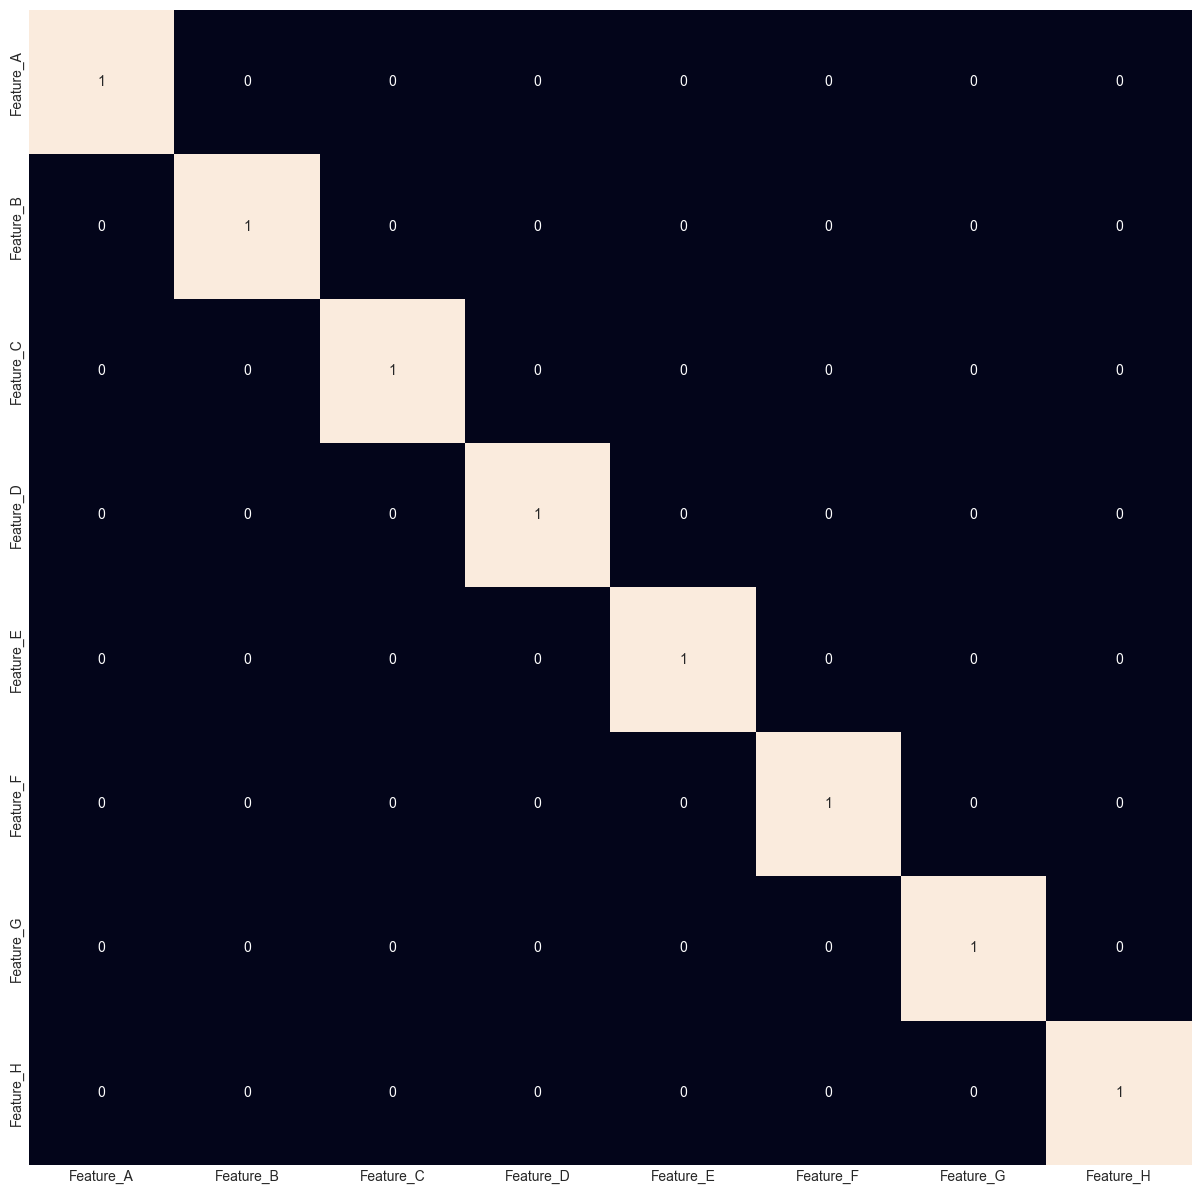

In [18]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

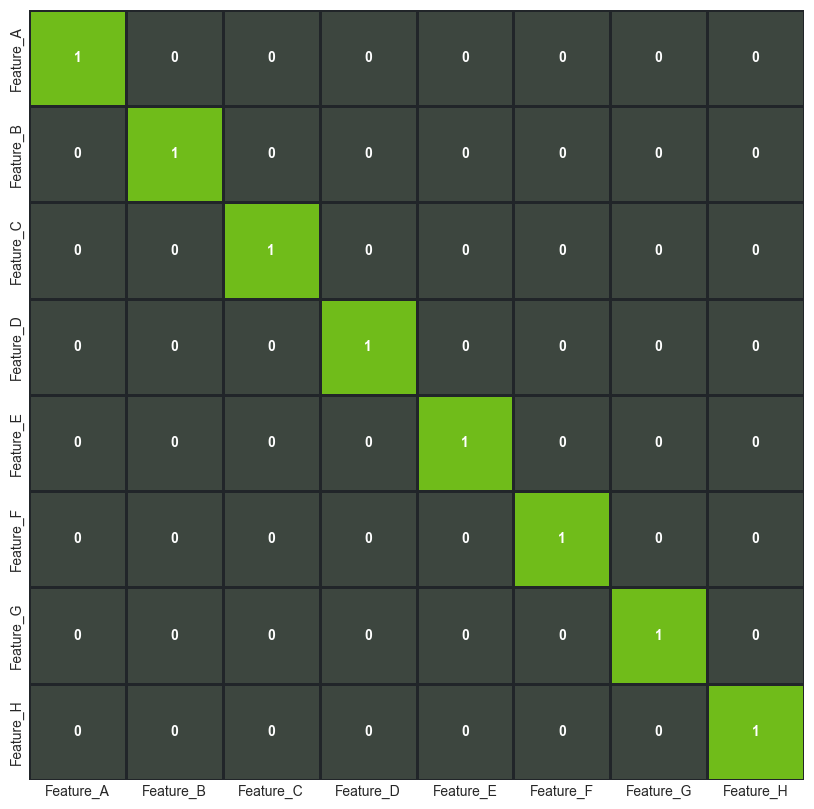

Standardization (it is a methof of feature scaling that standardizes data by reducing the mean to 0 and the standard deviation to 1 & helps machine learning models learn efficiently.)

In [44]:

data = {
    'Numerical_Feature_1': [10, 20, 15, 25, 30],
    'Numerical_Feature_2': [100, 120, 110, 130, 90],
    'Education': ['Graduation', 'PhD', 'Master', 'Graduation', 'Basic'],
    'Marital_Status': ['Single', 'Married', 'Together', 'Divorced', 'Single']
}
df = pd.DataFrame(data)
numerical_cols = ['Numerical_Feature_1', 'Numerical_Feature_2']
df_numerical = df[numerical_cols]

scaler = StandardScaler()
data_scaled_array = scaler.fit_transform(df_numerical)
data = pd.DataFrame(data_scaled_array, columns=numerical_cols, index=df.index)
print("Original Numerical Data:")
print(df_numerical)
print("\nScaled Numerical Data (DataFrame):")
print(data)

Original Numerical Data:
   Numerical_Feature_1  Numerical_Feature_2
0                   10                  100
1                   20                  120
2                   15                  110
3                   25                  130
4                   30                   90

Scaled Numerical Data (DataFrame):
   Numerical_Feature_1  Numerical_Feature_2
0            -1.414214            -0.707107
1             0.000000             0.707107
2            -0.707107             0.000000
3             0.707107             1.414214
4             1.414214            -1.414214


Using an Imputer from sklearn

In [47]:

# --- Create a Dummy DataFrame with Missing Values (Replace with your actual df) ---
data = {
    'Numerical_Feature_1': [10, 20, np.nan, 25, 30, 40, np.nan, 50],
    'Numerical_Feature_2': [100, 120, 110, np.nan, 90, 150, 130, 140],
    'Education': ['Graduation', 'PhD', 'Master', 'Graduation', 'Basic', np.nan, 'PhD', 'Master'],
    'Marital_Status': ['Single', 'Married', np.nan, 'Divorced', 'Single', 'Married', 'Together', np.nan],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1] # A dummy target column
}
df = pd.DataFrame(data)

print("Original DataFrame with Missing Values:")
print(df)
print("\nMissing values before imputation:")
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude the target column from imputation if it's not meant to be imputed
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 1. Pipeline for Numerical Features: Impute with Mean, then Scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Or 'median'
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' is crucial for unseen categories in test data
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)
df_processed_array = preprocessor.fit_transform(df)
numerical_feature_names = numerical_cols
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

all_processed_column_names = list

Original DataFrame with Missing Values:
   Numerical_Feature_1  Numerical_Feature_2   Education Marital_Status  Target
0                 10.0                100.0  Graduation         Single       0
1                 20.0                120.0         PhD        Married       1
2                  NaN                110.0      Master            NaN       0
3                 25.0                  NaN  Graduation       Divorced       1
4                 30.0                 90.0       Basic         Single       0
5                 40.0                150.0         NaN        Married       1
6                  NaN                130.0         PhD       Together       0
7                 50.0                140.0      Master            NaN       1

Missing values before imputation:
Numerical_Feature_1    2
Numerical_Feature_2    1
Education              1
Marital_Status         2
Target                 0
dtype: int64


Segmentation [I used T-distributed Stochastic Neighbor Embedding](It helps in visualizing high-dimensional data)

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

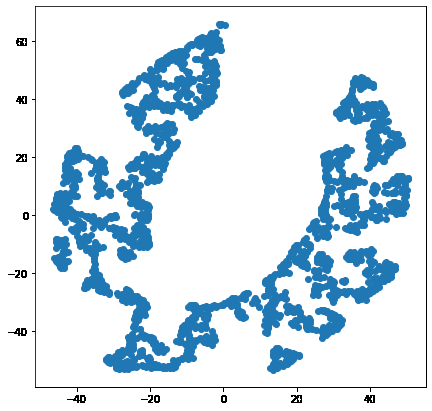

KMeans Clustering

In [59]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)

In [60]:
print(len(error))  # Should be 20


20


In [61]:
import seaborn as sb
sb.set_theme(style="whitegrid")  # Reset Seaborn styles


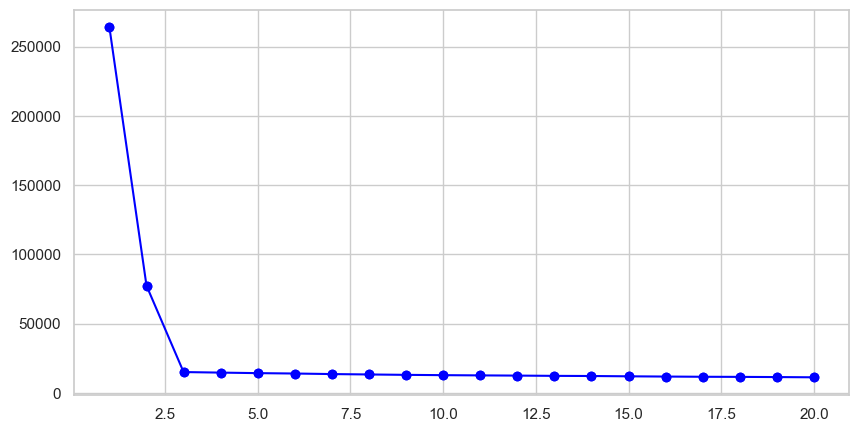

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error, marker="o", linestyle="-", color="blue")  # Keep same color
plt.scatter(range(1, 21), error, color="blue") 
plt.grid(True) # Make scatter blend in
plt.show()


In [63]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)


Scatterplot is be used to see all the 6 clusters formed by KMeans Clustering.

In [ ]:
plt.figure(figsize=(7, 7))
# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
custom_colors = ["#FF5733", "#33FF57", "#3357FF", "#F333FF", "#FFD700"]  # Example colors
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne, palette=custom_colors)

plt.show()



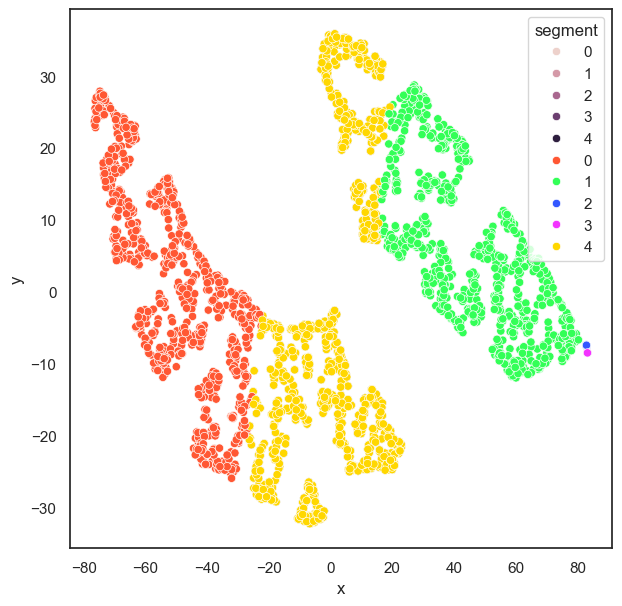

--------------------------- THE END -----------------------------------

In [88]:
print("This project demonstrates how Unsupervised Learning (K-Means Clustering) can be used for customer segmentation, helping businesses improve marketing strategies and customer engagement.")
print("And with this we successfully complete the project.")
print("Thank you for your attention.")

This project demonstrates how Unsupervised Learning (K-Means Clustering) can be used for customer segmentation, helping businesses improve marketing strategies and customer engagement.
And with this we successfully complete the project.
Thank you for your attention.
